# Lab 7.01 - Time series analysis

In [1]:
# Package imports
import numpy as np                                  # "Scientific computing"
import pandas as pd                                 # Dataframe

import scipy.stats as stats                         # Statistical tests
from sklearn.linear_model import LinearRegression   # Linear regression model

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz

C:\Users\32468\AppData\Local\Temp\ipykernel_8700\2839152206.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd                                 # Dataframe


### Exercise 1 - House sales

The file House Sales.csv contains monthly data on the number of new one-family
houses sold in the United States (in thousands) from January 1991 through December 2011.
Housing sales were steadily trending upward until about the beginning of 2006, then the
bottom fell out of the housing market, and sales eventually started trending upward again.   

- First Create a time series chart of the data.
- Add predictions for Simple Moving Average with span of 3, 6 and 12 months to the dataframe.
- Add predictions for Simple Exponential Smooting to the dataframe.
- Add predictions for Double Exponential Smoothing to the dataframe.
- Calculate the MAE to find the best model

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Monthly%20House%20Sales.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])
data.head()

C:\Users\32468\AppData\Local\Temp\ipykernel_30892\2792024889.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Monthly%20House%20Sales.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])


,Houses Sold
Month,
jan/91,401
feb/91,482
mrt/91,507
apr/91,508
mei/91,517


First Create a time series chart of the data.

<Axes: xlabel='Month'>

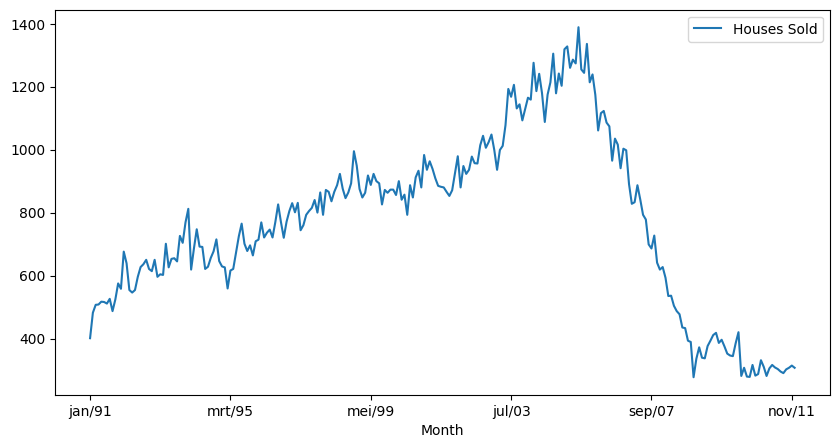

In [6]:
data.plot(y='Houses Sold', figsize=[10,5])

Add predictions for Simple Moving Average with span of 3, 6 and 12 months to the dataframe.

In [7]:
data['SMA3'] = data['Houses Sold'].rolling(3).mean()
data['SMA6'] = data['Houses Sold'].rolling(6).mean()
data['SMA12'] = data['Houses Sold'].rolling(12).mean()
data

,Houses Sold,SMA3,SMA6,SMA12
Month,,,,
jan/91,401,NaN,NaN,NaN
feb/91,482,NaN,NaN,NaN
mrt/91,507,463.333333,NaN,NaN
apr/91,508,499.000000,NaN,NaN
mei/91,517,510.666667,NaN,NaN
...,...,...,...,...
aug/11,290,296.000000,302.833333,302.000000
sep/11,302,295.666667,302.333333,300.833333
okt/11,307,299.666667,300.833333,302.916667


<Axes: xlabel='Month'>

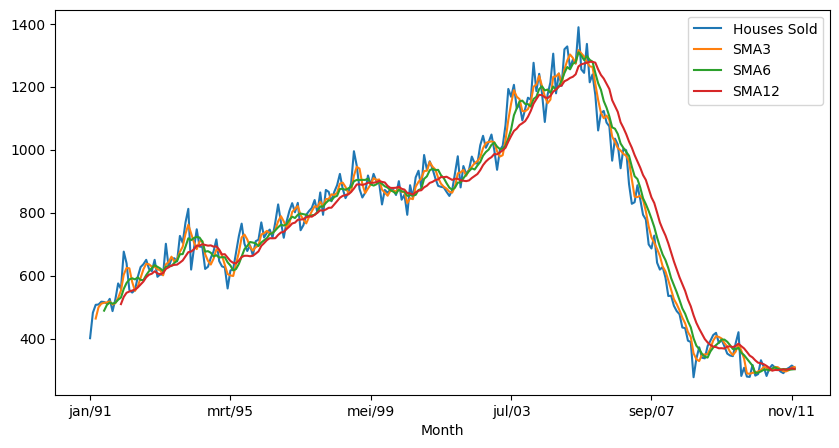

In [8]:
data.plot(y=['Houses Sold', 'SMA3', 'SMA6', 'SMA12'], figsize=[10,5])

Add predictions for Simple Exponential Smooting to the dataframe.

c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


<Axes: xlabel='Month'>

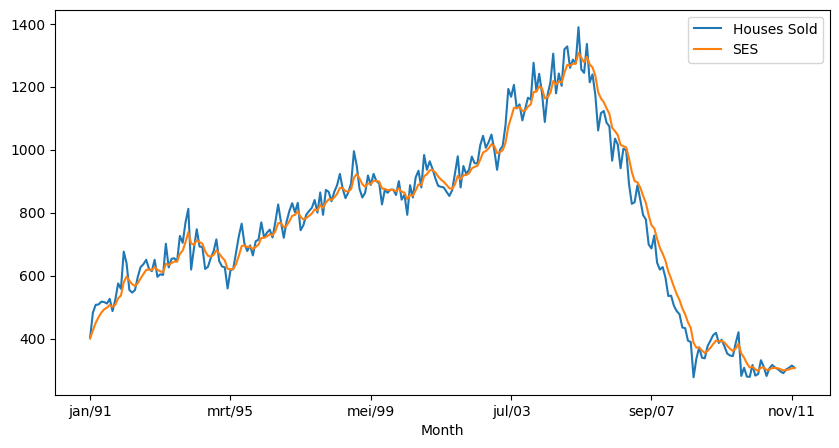

In [9]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
data_ses = SimpleExpSmoothing(data['Houses Sold']).fit(smoothing_level=.3) #alpha
data['SES'] = data_ses.level
data.plot(y=['Houses Sold', 'SES'], figsize=[10,5])

Add predictions for Double Exponential Smoothing to the dataframe.

c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
C:\Users\32468\AppData\Local\Temp\ipykernel_30892\2063727172.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

<Axes: xlabel='Month'>

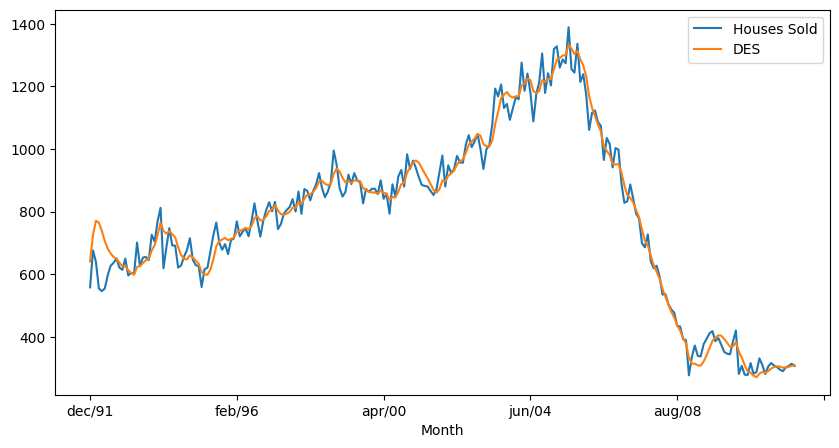

In [24]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
data_des = Holt(data['Houses Sold']).fit(smoothing_level=.3, smoothing_trend=.3) # alpha & beta
data['DES'] = data_des.level
data.plot(y=['Houses Sold', 'DES'], figsize=[10,5])

Calculate the MAE to find the best model. First drop the rows with NaN.

In [15]:
data.head()

,Houses Sold,SMA3,SMA6,SMA12,SES,DES
Month,,,,,,
dec/91,558,552.333333,530.166667,509.333333,536.865441,536.865441
jan/92,676,603.000000,557.666667,532.250000,578.605809,578.605809
feb/92,639,624.333333,576.500000,545.333333,596.724066,596.724066
mrt/92,554,623.000000,587.666667,549.250000,583.906846,583.906846
apr/92,546,579.666667,591.333333,552.416667,572.534792,572.534792


In [ ]:
columns = ['SMA3', 'SMA6', 'SMA12', 'SES', 'DES']

In [14]:
data = data.dropna()
data.head()

,Houses Sold,SMA3,SMA6,SMA12,SES,DES
Month,,,,,,
dec/91,558,552.333333,530.166667,509.333333,536.865441,536.865441
jan/92,676,603.000000,557.666667,532.250000,578.605809,578.605809
feb/92,639,624.333333,576.500000,545.333333,596.724066,596.724066
mrt/92,554,623.000000,587.666667,549.250000,583.906846,583.906846
apr/92,546,579.666667,591.333333,552.416667,572.534792,572.534792


In [21]:
columns = ['SMA3', 'SMA6', 'SMA12', 'SES', 'DES']

In [23]:
from sklearn.metrics import mean_absolute_error

for c in columns:
  print(f'MAE {c} = {mean_absolute_error(data["Houses Sold"], data[c])}')

MAE SMA3 = 26.431535269709546
MAE SMA6 = 36.81120331950208
MAE SMA12 = 54.41562932226833
MAE SES = 30.448560367366575
MAE DES = 30.448560367366575


In [ ]:
# Conclusion
# SMA3 is the best model

## Source
Business Analytics Data Analysis & Decision Making 